<a href="https://colab.research.google.com/github/ponchakridsrisuwan/Classification/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/train.csv').fillna(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [ ]:
gp =pd.read_csv("test.csv").fillna(0)

In [ ]:
data = df.copy()

data['Pclass'] = data.Pclass.astype('category')
data['Age'] = data.Age.astype('category')
data['Fare'] = data.Fare.astype('category')

data['Pclass'] = data.Pclass
data['Age'] = data.Age
data['Fare'] = data.Fare


In [ ]:
data.columns
data.sort_values(by='Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,0.0,0,0,312993,7.7750,0,S
128,129,1,3,"Peter, Miss. Anna",female,0.0,1,1,2668,22.3583,F E69,C
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,0.0,0,2,2668,22.3583,0,C
284,285,0,1,"Smith, Mr. Richard William",male,0.0,0,0,113056,26.0000,A19,S
538,539,0,3,"Risien, Mr. Samuel Beard",male,0.0,0,0,364498,14.5000,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,0,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,0,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,0,S


In [ ]:
columns = ['Pclass', 'Age', 'Fare']
X = data[ columns ].values
y = data.Survived.values

In [ ]:
columns = ['Pclass', 'Age', 'Fare']
listg1 = data[ columns ].values
listg2 = data.Survived.values

### DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "entropy")
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

ผลลัพธ์ของ Tree

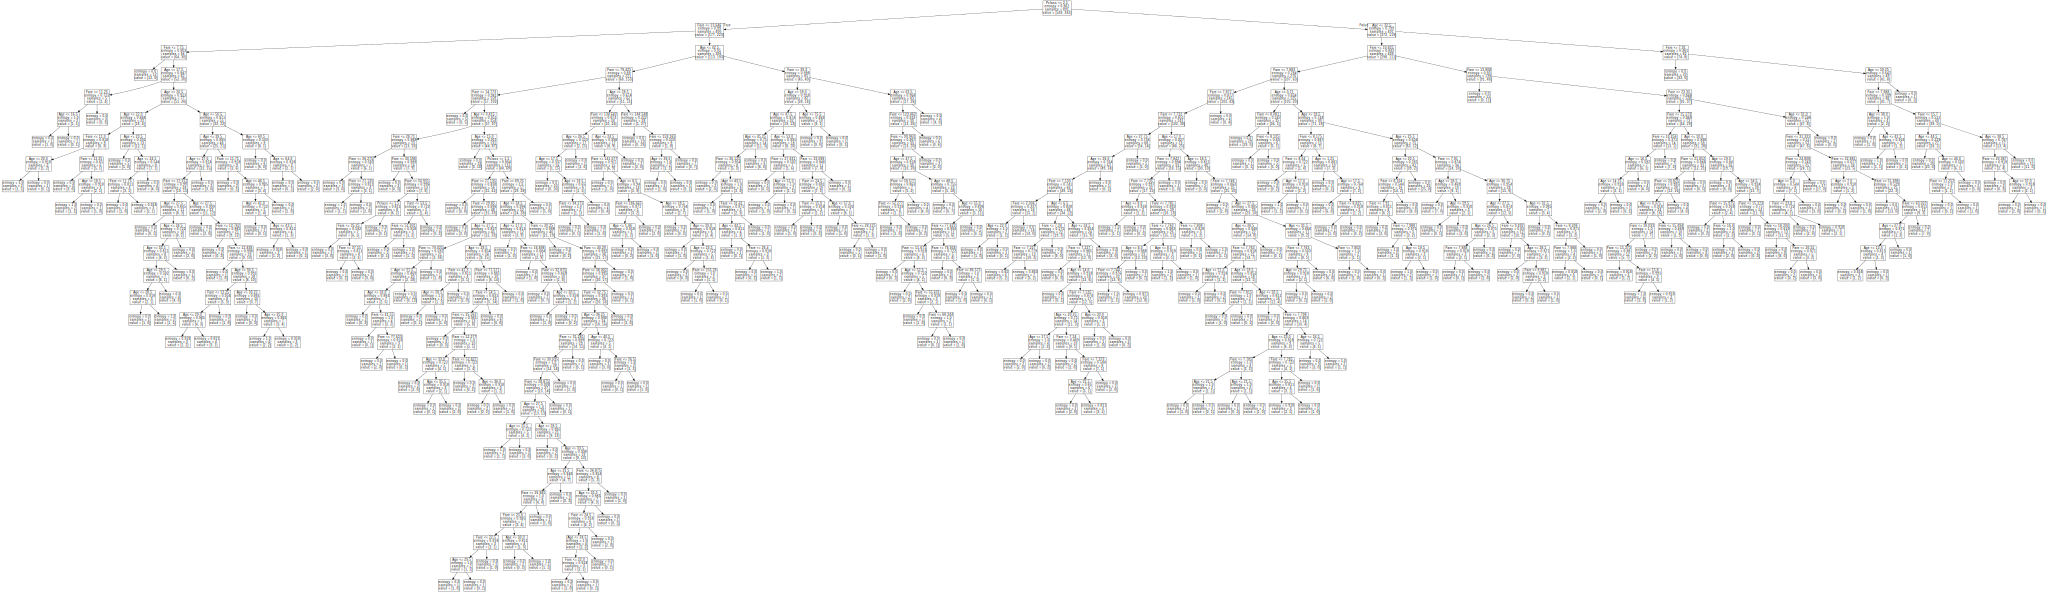

In [ ]:
import graphviz
import sklearn
dot_data = sklearn.tree.export_graphviz(tree, out_file=None, feature_names=columns)
graphviz.Source(dot_data)

In [ ]:
def n(x):
    print(x)
    p = tree.predict([ x ])
    print(data.Survived[p[0]])
n([2,0,4])

[2, 0, 4]
0


In [ ]:
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier(criterion = "entropy")
tree = tree.fit(X, y)
ypred = tree.predict(listg1)



วิเคราะห์ความถูกต้อง

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(ypred, listg2))


0.9494949494949495


แสดงผลลัพธ์ด้วย confusion matrix

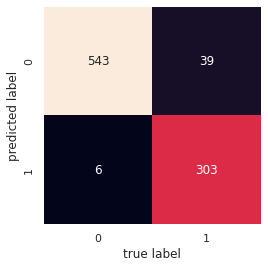

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

mat = confusion_matrix(listg2, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');